# Text Classification with Pytorch

- [Spam Ham Classification](https://www.kaggle.com/aaditkapoor1201/pytorch-spam-ham-classification)

## Understanding Checkpoint

- [saving-loading-your-model-in-pytorch](https://medium.com/udacity-pytorch-challengers/saving-loading-your-model-in-pytorch-741b80daf3c)
- [checkpointing-tutorial-for-tensorflow-keras-and-pytorch](https://blog.floydhub.com/checkpointing-tutorial-for-tensorflow-keras-and-pytorch/)

In [1]:
%matplotlib inline
import torch
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spacy #load spacy

In [2]:
import torch.nn.functional as F

In [3]:
from torch import nn
from torch.autograd import Variable

In [4]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [5]:
DATA_DIR = "/home/sankarshan/Documents/code/dataset/textdata/"

In [6]:
!ls -lshrt {DATA_DIR}

total 354M
 64M -rwxrwxrwx 1 sankarshan sankarshan  64M Mar  9  2019 IMDB_Dataset.csv
956K -rw-r--r-- 1 sankarshan sankarshan 956K May  8 21:48 ml-latest-small.zip
265M -rw-r--r-- 1 sankarshan sankarshan 265M May  8 21:50 ml-latest.zip
4.0K -rw-r--r-- 1 sankarshan sankarshan   71 Oct 19 23:39 README.md
 26M -rw-rw-r-- 1 sankarshan sankarshan  26M Oct 19 23:42 imdb-dataset-of-50k-movie-reviews.zip
4.0K drwxr-xr-x 2 sankarshan sankarshan 4.0K Oct 19 23:43 ml-latest-small


In [7]:
df = pd.read_csv(DATA_DIR+'IMDB_Dataset.csv')

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
def clean_review(text):
    # Strip HTML tags
    text = re.sub('<[^<]+?>', ' ', text)
 
    # Strip escaped quotes
    text = text.replace('\\"', '')
 
    # Strip quotes
    text = text.replace('"', '')
    
    text = text.lower()
 
    return text

def normalize(comment, lowercase=True):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        if not word.is_stop:
            lemma = word.lemma_.strip()
            lemmatized.append(lemma)
        
    return " ".join(lemmatized)


In [10]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [11]:
%%time
df['cleaned_review'] = df['review'].apply(clean_review)
df['normalized_review'] = df['cleaned_review'].apply(normalize) 

CPU times: user 1min 22s, sys: 107 ms, total: 1min 22s
Wall time: 1min 22s


In [12]:
df.head()

,review,sentiment,cleaned_review,normalized_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,reviewer mention watch 1 oz episode hook . rig...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming t...,wonderful little production . film technique ...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,basically family little boy ( jake ) think zom...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei's love in the time of money is a...,petter mattei love time money visually stun fi...


In [13]:
df.iloc[0, 0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [14]:
df.iloc[0, 2]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.  the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.  it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  i would say the main appeal of the show is due to the fact that it goes where other sh

In [15]:
df.iloc[0, 3]

'reviewer mention watch 1 oz episode hook . right , exactly happen .  thing strike oz brutality unflinching scene violence , set right word . trust , faint hearted timid . pull punch regard drug , sex violence . hardcore , classic use word .  call oz nickname give oswald maximum security state penitentary . focus mainly emerald city , experimental section prison cell glass front face inwards , privacy high agendum . -PRON- city home .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffle , death stare , dodgy dealings shady agreement far away .  main appeal fact go show dare . forget pretty picture paint mainstream audience , forget charm , forget romance ... oz mess . episode see strike nasty surreal , ready , watch , develope taste oz , get accustom high level graphic violence . violence , injustice ( crook guard sell nickel , inmate kill order away , mannered , middle class inmate turn prison bitch lack street skill prison experience ) watch oz , comfor

In [16]:
df.shape

(50000, 4)

In [17]:
df.sentiment = df.sentiment.map({"positive": 1, "negative":0})

In [18]:
features = df.normalized_review.values
labels = df.sentiment.values
num_words = 1000

In [19]:
features.shape , labels.shape

((50000,), (50000,))

In [20]:
t = Tokenizer(num_words=1000)
t.fit_on_texts(features)

In [21]:
%%time
features = t.texts_to_matrix(features, mode='tfidf')

CPU times: user 13.5 s, sys: 123 ms, total: 13.6 s
Wall time: 13.6 s


## Understand the dimension

- `input_dim`: dimension of the input paragraph/review
  - remember each input `normalized_review` is transformed into a `1000` dimension vector by keras tokenizer
  
- `hidden_dim`: denotes the number of neurons in the hidden layer

- `output_dim`: denotes the number of category

In [22]:
input_dim = num_words
hidden_dim = 100
output_dim = 2

In [23]:
# Building model

class LinNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.l3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        
        # shape of X: (batch_size, input_dim)
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = self.l3(out)
        
        return out

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=34)


In [26]:
np.NINF

-inf

In [31]:
def train(epochs):
    loss_hist = []
    acc_hist = []
    
    x_train = Variable(torch.from_numpy(features_train)).float()
    y_train = Variable(torch.from_numpy(labels_train)).long()
    model.train()
    
    acc_best = np.NINF
    check_flag = False
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
        acc = float(pred)/float(len(x_train))
        
        if acc > acc_best:
            acc_best = acc
            state_dict = model.state_dict()
            optimizer_state = optimizer.state_dict()
            check_flag = True
        
        status = f"epoch {epoch+1}/{epochs}\tloss: {loss.item():.4}\t acc: {acc:.4}" 
        
        if check_flag:
            status = status + "\t >> Best Checkpoint <<"
            check_flag = False
        
        
        print(status)
        loss_hist.append(np.round(loss.item(),4))
        acc_hist.append(np.round(acc,2))
        
        loss.backward()
        optimizer.step()

    checkpoint_best = {"state_dict":state_dict, 'optimizer_state': optimizer_state}
    
    return loss_hist, acc_hist, checkpoint_best

In [44]:
def test(model, epochs):
    loss_hist = []
    acc_hist = []
    
    model.eval()
    x_test = Variable(torch.from_numpy(features_test)).float()
    y_test = Variable(torch.from_numpy(labels_test)).long()
    for epoch in range(epochs):
        with torch.no_grad():
            y_pred = model(x_test)
            loss = criterion(y_pred, y_test)
            pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
            
            acc = float(pred)/float(len(x_test))
            status = f"epoch {epoch+1}/{epochs}\tloss: {loss.item()}\t acc: {acc} %" 
            print(status)
            
            loss_hist.append(np.round(loss.item(),4))
            acc_hist.append(np.round(acc,4))
    
    return loss_hist, acc_hist

In [33]:
model = LinNet(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [34]:
%%time
loss_hist, acc_hist, checkpoint_best = train(100)

epoch 1/100	loss: 0.6928	 acc: 0.5108	 >> Best Checkpoint <<
epoch 2/100	loss: 0.5893	 acc: 0.7112	 >> Best Checkpoint <<
epoch 3/100	loss: 1.139	 acc: 0.5234
epoch 4/100	loss: 0.4531	 acc: 0.8189	 >> Best Checkpoint <<
epoch 5/100	loss: 0.7968	 acc: 0.6698
epoch 6/100	loss: 0.528	 acc: 0.7616
epoch 7/100	loss: 0.4885	 acc: 0.8349	 >> Best Checkpoint <<
epoch 8/100	loss: 0.5219	 acc: 0.7715
epoch 9/100	loss: 0.5271	 acc: 0.736
epoch 10/100	loss: 0.4854	 acc: 0.7803
epoch 11/100	loss: 0.4151	 acc: 0.8345
epoch 12/100	loss: 0.3867	 acc: 0.8377	 >> Best Checkpoint <<
epoch 13/100	loss: 0.4026	 acc: 0.8286
epoch 14/100	loss: 0.3605	 acc: 0.8499	 >> Best Checkpoint <<
epoch 15/100	loss: 0.3676	 acc: 0.8506	 >> Best Checkpoint <<
epoch 16/100	loss: 0.3672	 acc: 0.8521	 >> Best Checkpoint <<
epoch 17/100	loss: 0.3317	 acc: 0.863	 >> Best Checkpoint <<
epoch 18/100	loss: 0.33	 acc: 0.8607
epoch 19/100	loss: 0.3313	 acc: 0.8578
epoch 20/100	loss: 0.3142	 acc: 0.8661	 >> Best Checkpoint <<
epoch

In [40]:
checkpoint = {'model': LinNet(input_dim, hidden_dim, output_dim),
              'state_dict': checkpoint_best['state_dict'],
              'optimizer' : checkpoint_best['optimizer_state']}

In [41]:
DIR_model = "/home/sankarshan/Documents/code/nlproc/models/"

In [47]:
import warnings

In [48]:
warnings.filterwarnings("ignore")

In [50]:
%%time
torch.save(checkpoint, DIR_model+'review_classification_checkpoint.pth')

CPU times: user 10.3 ms, sys: 4.25 ms, total: 14.5 ms
Wall time: 13.4 ms


In [51]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    #model.eval()
    return model

model_test = load_checkpoint(DIR_model+'review_classification_checkpoint.pth')

In [52]:
test_loss_hist, test_acc_hist = test(model_test, 100)

epoch 1/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 2/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 3/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 4/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 5/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 6/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 7/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 8/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 9/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 10/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 11/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 12/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 13/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 14/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 15/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 16/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 17/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 18/100	loss: 0.8047232031822205	 acc: 0.8384 %
epoch 19/100	loss: 0.8047232031822205	 acc: 0.8384 %
ep

Text(0, 0.5, 'loss')

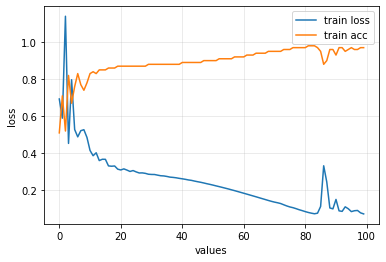

In [35]:
plt.figure()
plt.plot(loss_hist, label = "train loss")
plt.plot(acc_hist ,label="train acc")
plt.legend()
plt.xlabel("values")
plt.grid(alpha=0.3)
plt.ylabel("loss")